In [1]:
from fastai.vision import *
from fastai.metrics import *

In [2]:
path = untar_data(URLs.PETS); path

PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet')

In [3]:
path.ls()

[PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/models'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/small-96'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/image_gen'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/crappy'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/small-256')]

In [4]:
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images/pug_126.jpg'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images/japanese_chin_122.jpg'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images/basset_hound_16.jpg'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images/samoyed_18.jpg'),
 PosixPath('/home/humonics/.fastai/data/oxford-iiit-pet/images/german_shorthaired_25.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
bs=64
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

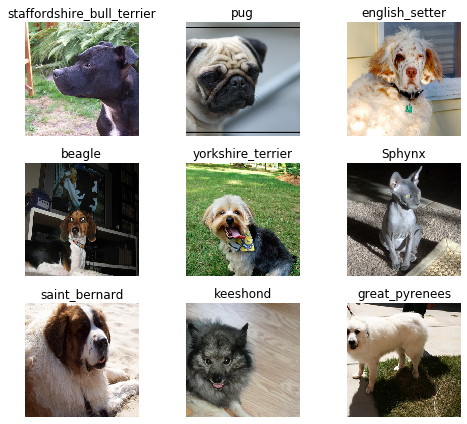

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.350819,0.345233,0.878214,00:27
1,0.609456,0.268438,0.910014,00:20
2,0.394080,0.240488,0.922869,00:21
3,0.265383,0.218147,0.924222,00:19


In [14]:
learn.save('stage-1')

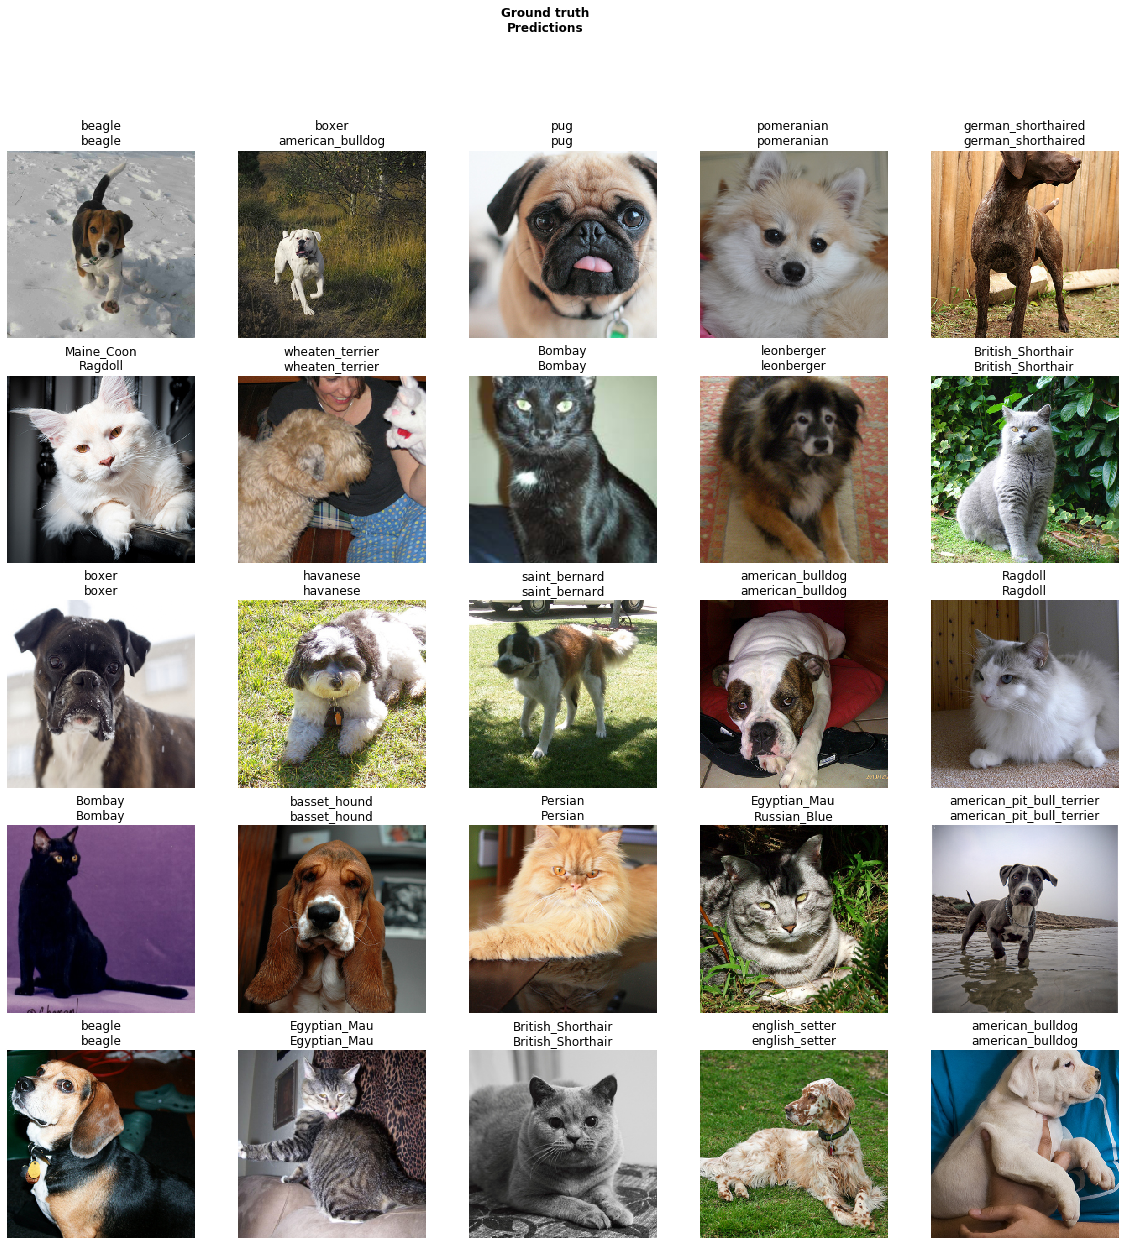

In [15]:
learn.show_results()

In [26]:
print(models.densenet121())

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu